In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x):
    """Original function: y = (x+3)²"""
    return (x + 3)**2

In [3]:
def grad_f(x):
    """Gradient (derivative) of f: dy/dx = 2(x+3)"""
    return 2 * (x + 3)

In [ ]:
def gradient_descent(start_x=2, learning_rate=0.1, max_iter=50, tol=1e-6):
  
    x = start_x
    x_history = [x]
    
    print(f"Starting Gradient Descent from x = {start_x}")
    print(f"Learning rate = {learning_rate}\n")
    print(f"{'Iteration':<10} {'x':<15} {'f(x)':<15} {'Gradient':<15}")
    print("-" * 55)
    
    for i in range(max_iter):
        gradient = grad_f(x)
        
        # Print current iteration details
        if i < 10 or i == max_iter - 1:  # Print first 10 and last iteration
            print(f"{i:<10} {x:<15.6f} {f(x):<15.6f} {gradient:<15.6f}")
        
        # Update x using gradient descent rule: x_new = x - learning_rate * gradient
        x_new = x - learning_rate * gradient
        
        x_history.append(x_new)
        
        # Check for convergence
        if abs(x_new - x) < tol:
            print(f"\nConverged after {i+1} iterations!")
            break
        
        x = x_new
    
    return x, f(x), x_history

In [5]:
# Run gradient descent starting from x = 2
min_x, min_y, x_steps = gradient_descent(start_x=2, learning_rate=0.1)

print("\n" + "="*55)
print(f"Local minima found at x = {min_x:.10f}")
print(f"Minimum value y = {min_y:.10f}")
print(f"Number of steps taken: {len(x_steps)-1}")

Starting Gradient Descent from x = 2
Learning rate = 0.1

Iteration  x               f(x)            Gradient       
-------------------------------------------------------
0          2.000000        25.000000       10.000000      
1          1.000000        16.000000       8.000000       
2          0.200000        10.240000       6.400000       
3          -0.440000       6.553600        5.120000       
4          -0.952000       4.194304        4.096000       
5          -1.361600       2.684355        3.276800       
6          -1.689280       1.717987        2.621440       
7          -1.951424       1.099512        2.097152       
8          -2.161139       0.703687        1.677722       
9          -2.328911       0.450360        1.342177       
49         -2.999911       0.000000        0.000178       

Local minima found at x = -2.9999286376
Minimum value y = 0.0000000051
Number of steps taken: 50


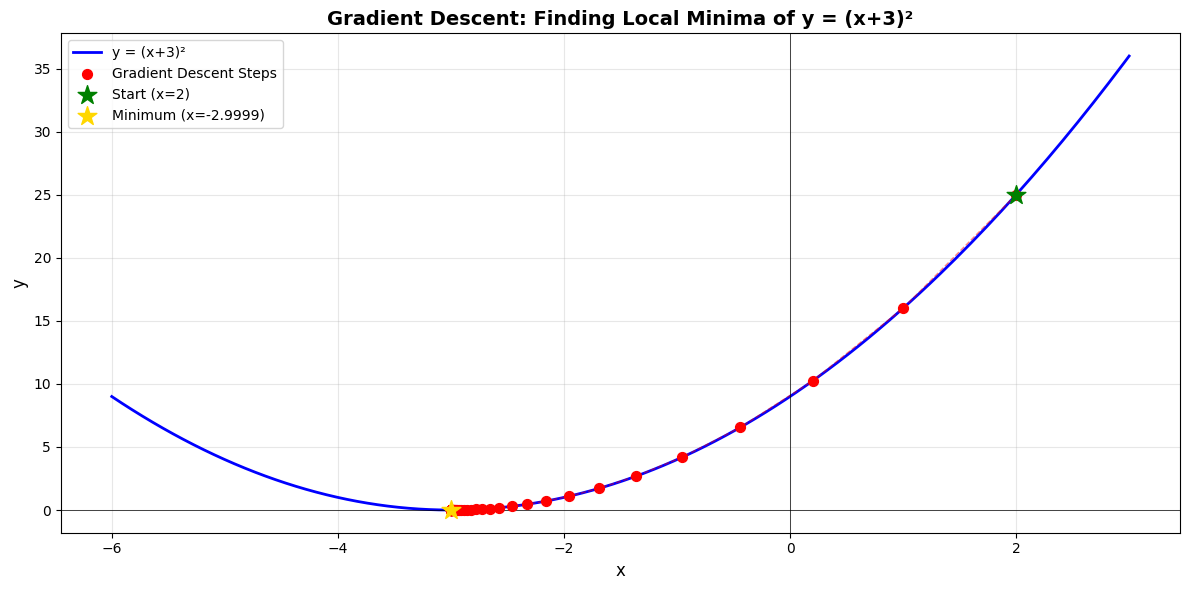

In [ ]:
# Create visualization
x_vals = np.linspace(-6, 3, 200)
y_vals = f(x_vals)

plt.figure(figsize=(12, 6))

# Plot the function
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='y = (x+3)²')

# Plot gradient descent steps
plt.scatter(x_steps, [f(x) for x in x_steps], color='red', s=50, 
            label='Gradient Descent Steps', zorder=5)

# Connect the steps with lines
plt.plot(x_steps, [f(x) for x in x_steps], 'r--', alpha=0.5, linewidth=1)

# Mark the starting point
plt.scatter(x_steps[0], f(x_steps[0]), color='green', s=200, 
            marker='*', label=f'Start (x={x_steps[0]})', zorder=6)

# Mark the minimum point
plt.scatter(min_x, min_y, color='gold', s=200, 
            marker='*', label=f'Minimum (x={min_x:.4f})', zorder=6)

plt.title('Gradient Descent: Finding Local Minima of y = (x+3)²', fontsize=14, fontweight='bold')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()